 # STACKED BAR CHARTS & MARIMEKKO CHARTS
 
 Marimekko:
 Commonly referred to as Mosaic plots; spine plots or just Mekko.  

In essence, they are just stacked bar charts where the bar widths are used to display another variable - usually the group's proportion to the total.

Marimekko chart: **matplotlib**: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmp
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import warnings
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxl', grid=False)
warnings.filterwarnings('ignore')

In [3]:
olympics = pd.read_csv('./Olympics-Dataset.csv')

Using the Olympic games dataset, and data on the Marathon event as it was the closest sounding thing to Marimekko.


In [50]:
# selected countries to focus on
focus = ['Ethiopia', 'Kenya', 'United States', 'Japan', 'Great Britain', 'South Korea', 'Portugal']

In [5]:
# selected events, queried
marathon_men = olympics.query('''Event == "Athletics Men's Marathon" and Year > 1930''')

In [6]:
marathon_men_focus = marathon_men['Team'].value_counts()[focus]

In [7]:
marathon_men_focus

Ethiopia         37
Kenya            34
United States    55
Japan            53
Great Britain    56
South Korea      44
Portugal         27
Name: Team, dtype: int64

In [8]:
# medals vs no medals in the event
marathon_men_medals = marathon_men.query('~Medal.isnull()')
marathon_men_no_medals = marathon_men.query('Medal.isnull()')

In [9]:
marathon_men_focus_medals = marathon_men_medals['Team'].value_counts()[focus]
marathon_men_focus_no_medals = marathon_men_no_medals['Team'].value_counts()[focus]

In [10]:
marathon_men_focus_no_medals

Ethiopia         29
Kenya            27
United States    51
Japan            48
Great Britain    51
South Korea      42
Portugal         26
Name: Team, dtype: int64

In [11]:
marathon_men_focus_medals

Ethiopia         8
Kenya            7
United States    4
Japan            5
Great Britain    5
South Korea      2
Portugal         1
Name: Team, dtype: int64

In [12]:
# y values for athletes with medals
y_b = []
for man in marathon_men_focus_medals:
    y_b.append(man)

In [13]:
y_b

[8, 7, 4, 5, 5, 2, 1]

In [14]:
# y values for athletes without medals
y_n = []
for man in marathon_men_focus_no_medals:
    y_n.append(man)

In [15]:
y_n

[29, 27, 51, 48, 51, 42, 26]

In [16]:
# x axis tick labels
x_ticks = []
for men in marathon_men_focus.index:
    x_ticks.append(men)

In [17]:
x_ticks

['Ethiopia',
 'Kenya',
 'United States',
 'Japan',
 'Great Britain',
 'South Korea',
 'Portugal']

In [53]:
marathon_women = olympics.query('''Event == "Athletics Women's Marathon" and Year > 1930''')

In [54]:
marathon_women_focus = marathon_women[['Team', 'Medal']]

In [57]:
marathon_women_mosaic = marathon_women_focus .query('''Team == "Ethiopia" or Team == "Kenya" or Team == "United States" or Team == "Japan" or Team == "Great Britain" or Team == "South Korea" or Team == "Portugal" ''')

In [92]:
marathon_women_mosaic = marathon_women_mosaic.loc[~marathon_women_mosaic.Medal.isnull()]

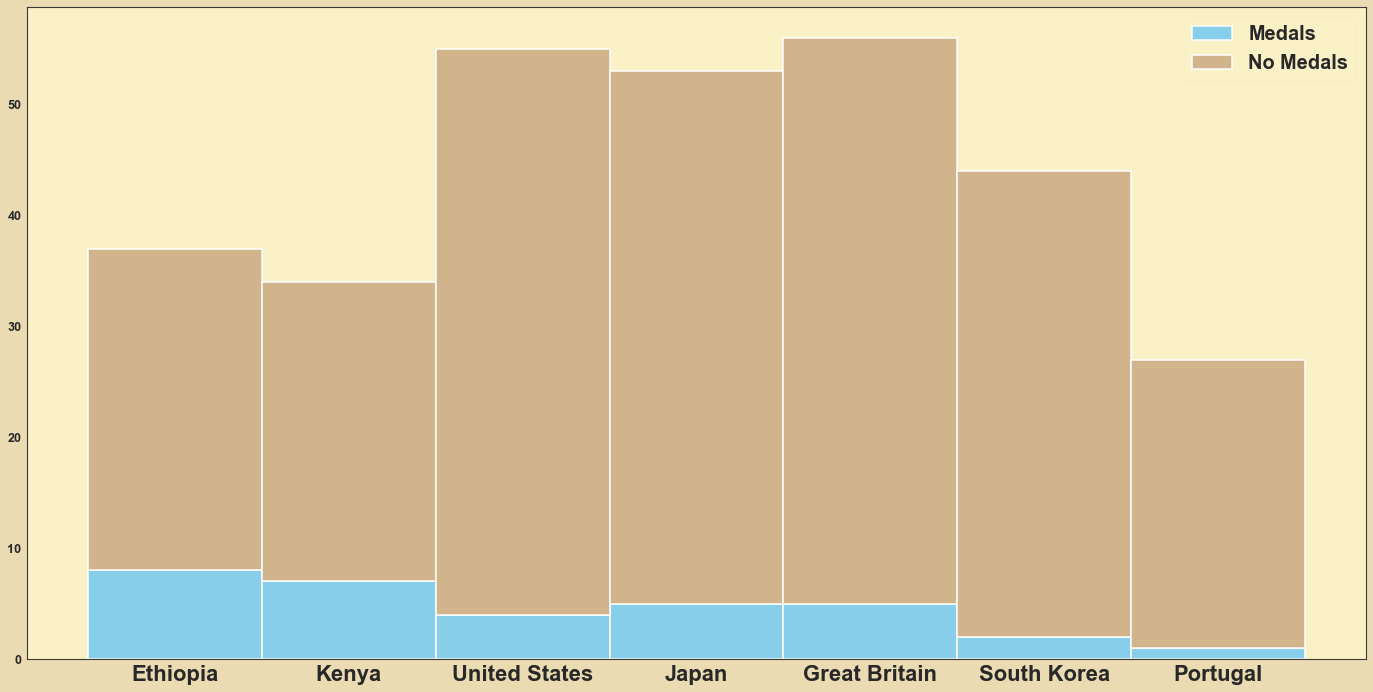

In [116]:
bar_width = 1
bar_l = np.arange(0, len(x_ticks))
tick_pos = [i + (bar_width / 2) for i in bar_l]

fig, ax = plt.subplots(1, figsize=(24,12))

plt.bar(x_ticks,
        y_b,
        width=1,
        align='edge',
        edgecolor='w',
        linewidth=1.5,
        color='skyblue',
        label='Medals'
        )

plt.bar(x_ticks,
       y_n,
       bottom = y_b,
       width = 1,
        align='edge',
        edgecolor='w',
        linewidth=1.5,
        color='tan',
        label='No Medals'
       )

plt.xticks(tick_pos, x_ticks, fontsize=22)
plt.legend(prop={'size': 20})

plt.show()

Marimekko:
Different visual. Here we'll only look at the medalists and see the different medals from the selected countries.



In [110]:
from statsmodels.graphics.mosaicplot import mosaic

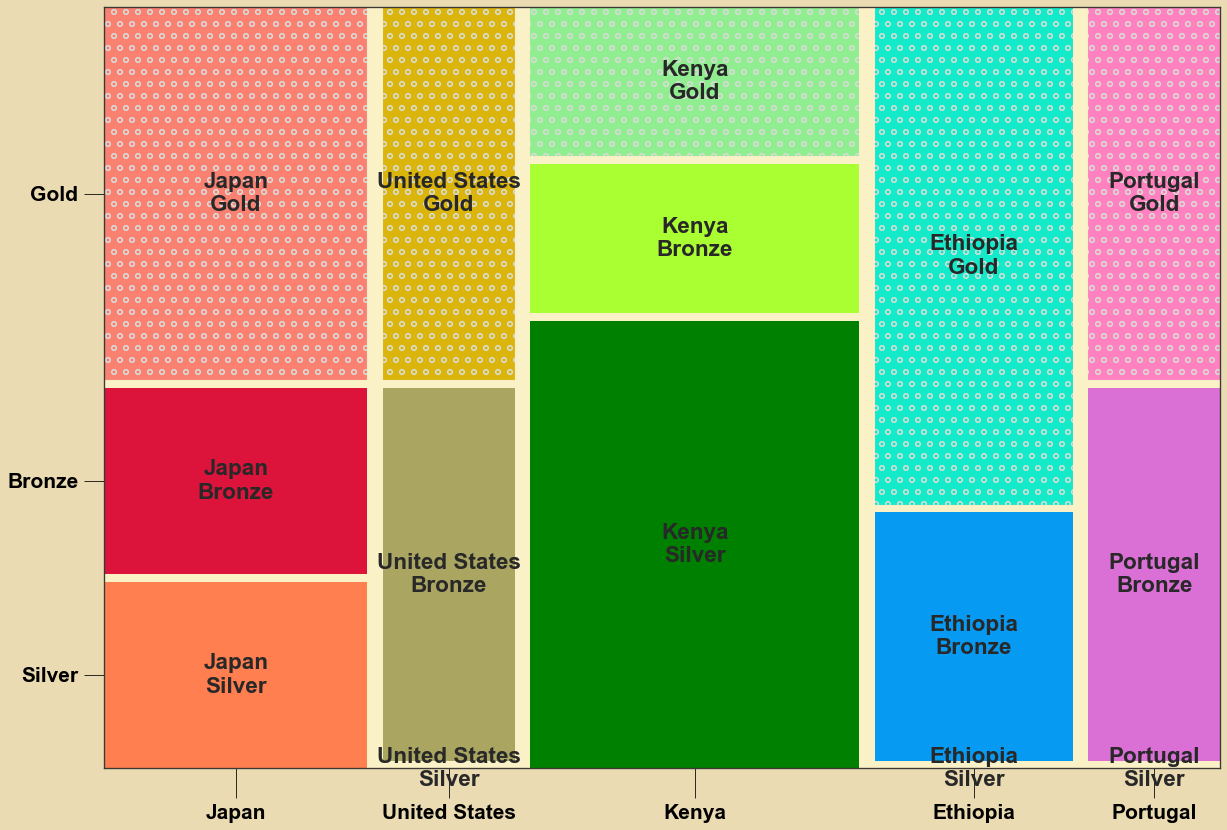

In [118]:
fig, ax = plt.subplots(figsize=(20, 14))
props = {}
props[('United States', 'Gold')] = {'facecolor': 'xkcd:gold',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Japan', 'Gold')] = {'facecolor': 'salmon',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Kenya', 'Gold')] = {'facecolor': 'lightgreen',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Ethiopia', 'Gold')] = {'facecolor': 'xkcd:aqua',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Portugal', 'Gold')] = {'facecolor': 'xkcd:pink',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Japan', 'Silver')] = {'facecolor': 'coral',
                       }
props[('Kenya', 'Silver')] = {'facecolor': 'green',
                      }
props[('Ethiopia', 'Silver')] = {'facecolor': 'black',
                       }
props[('United States', 'Bronze')] = {'facecolor': 'xkcd:khaki',
                                      
                       }
props[('Japan', 'Bronze')] = {'facecolor': 'crimson',
                       }
props[('Kenya', 'Bronze')] = {'facecolor': 'xkcd:lime',
                      }
props[('Ethiopia', 'Bronze')] = {'facecolor': 'xkcd:azure',
                       }
props[('Portugal', 'Bronze')] = {'facecolor': 'orchid',
                       }
ax.tick_params(axis='x', colors="black", size=30, labelsize=21)
ax.tick_params(axis='y', colors="black", size=20, labelsize=21)
plt.rcParams.update({'font.size': 27})
mosaic(marathon_women_mosaic, ["Team", "Medal"], gap=0.015, ax=ax, properties=props)
plt.show()